# Machine Learning
_These notes were written while following a lecture for IN-STK5000 H20_

Using sklearn and pandas to [convert categorical data to dummies (0 & 1)](#Transforming), [split into traning and test sets](#Splitting) and [scale the data](#Scaling)

In [4]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

Always keep in mind in an industry setting, things will be much more messy than how they are presented here.


In [5]:
# data = pd.read_csv('IN-STK5000-Notebooks-2020/data/adult.names')
# cannot read as csv, since this file is not a csv, nor a csv zipped file
! cat IN-STK5000-Notebooks-2020/data/adult.names

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

We'll need the last 14 rows to get the actual names out. this is done with a tail command.

In [6]:
!tail -n 14 IN-STK5000-Notebooks-2020/data/adult.names | awk -F: '{print "\x22"$1"\x22,"}'

'tail' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
colnames = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'martial-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'cap-gain',
    'cap-loss',
    'hours-per-week',
    'native-country',
    'income'
]

In [8]:
df = pd.read_csv('IN-STK5000-Notebooks-2020/data/adult.data.gz', names=colnames)
df

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,cap-gain,cap-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [9]:
df.describe()

,age,fnlwgt,education-num,cap-gain,cap-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
martial-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
cap-gain          32561 non-null int64
cap-loss          32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Transforming

We'll look into transforming categorical data from strings to dummy 0 and 1 to be easier understood by machines.

In [11]:
df['target'] = df['income'] == ' >50K'

In [12]:
colors = ['r' if t else 'b' for t in df['target']]

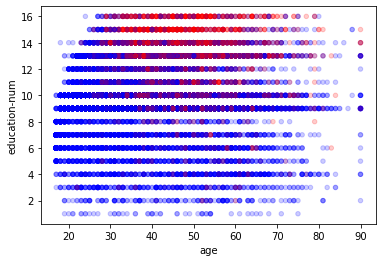

In [13]:
df.plot.scatter('age', 'education-num', c=colors, alpha= 0.2) # aplha makes this a gradient change, not hard red and hard blue

In [14]:
df.sample(10)  # selects 10 random rows

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,cap-gain,cap-loss,hours-per-week,native-country,income,target
8477,24,Private,178255,Some-college,10,Married-civ-spouse,Priv-house-serv,Wife,White,Female,0,0,40,?,<=50K,False
13782,44,Private,205474,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K,True
2465,39,Private,127772,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,3103,0,44,United-States,>50K,True
30534,33,Private,87310,9th,5,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,50,United-States,<=50K,False
16350,66,Private,192504,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K,False
21915,37,Private,99374,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,55,United-States,<=50K,False
29787,44,Private,186916,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1887,60,United-States,>50K,True
5331,53,Private,276515,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,Cuba,<=50K,False
13633,68,Private,217424,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,24,United-States,<=50K,False
1166,65,Private,350498,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,10605,0,20,United-States,>50K,True


In [15]:
def read_data(sample_size=None):
    colnames = [
        'age',
        'workclass',
        'fnlwgt',
        'education',
        'education-num',
        'martial-status',
        'occupation',
        'relationship',
        'race',
        'sex',
        'cap-gain',
        'cap-loss',
        'hours-per-week',
        'native-country',
        'income'
    ]
    
    df = pd.read_csv('IN-STK5000-Notebooks-2020/data/adult.data.gz', names=colnames)
    if sample_size:
        df = df.sample(sample_size)
        df.index = range(sample_size) # this will rename the indexes of our samlpe (since theyre random anyway)
        
    target = (df['income'] == ' >50K') *1 
    return df[colnames[:-1]], target

We will use th kNN algorithm to predict the target variable. (I love this course so much! <3)

kNN should def. be tried out with dense data.
The bigger k gets, the closer you get to the total average of the whole data set.

People often jump to more complex algorithms like random forest and neural networks, before trying out k- nearest neighbors, even though kNN could give a similar model, just less complex. Random forest is basically kNN, but decides how pure the neighborhood are, and chooses more based on that. (Like he said earlier, more complex, for little bit more correctness)

Talked a little about gerrymandering, since kNN is somewhat a real life example of this.

In [16]:
features, target = read_data(5000)  # funning our function, splitting target income out of the data set

In [17]:
features[['age', 'education-num']].iloc[43]   #iloc? what does this do? htink its just the 43 entry

age              21
education-num    10
Name: 43, dtype: int64

In [18]:
sum((features[['age', 'education-num']].iloc[42] - features[['age', 'education-num']].iloc[43])**2)  #euclidean distance

104

Note: I have different numbers than him, since my random sample is obvi gonna be diff from his

In [19]:
from sklearn.neighbors import DistanceMetric

In [20]:
DistanceMetric.get_metric('wminkowski', w=[3,1], p=2)

In [21]:
DistanceMetric.get_metric('wminkowski', w=[3,1], p=2).pairwise(features[['age', 'education-num']].iloc[:3])

array([[ 0.        , 27.29468813, 30.2654919 ],
       [27.29468813,  0.        ,  3.        ],
       [30.2654919 ,  3.        ,  0.        ]])

There are some categories that is impossible to actually measure distance between. (bachelors vs Masters vs HS-grad). Ontologies can be used later to help extract this info.

In [22]:
from sklearn.preprocessing import OneHotEncoder 

In [23]:
features['sex'].unique()

array([' Female', ' Male'], dtype=object)

In [24]:
encoder = OneHotEncoder(sparse=False, drop='first').fit(features[['sex']])

In [25]:
encoder.transform(features[['sex']])[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]])

In sci-kit-learn this fit/transform is a general format of this first step toward ML.

In [26]:
pd.get_dummies(features[['sex']], drop_first=True)  # same thing just with pandas (honestly looks easier)

,sex_ Male
0,0
1,0
2,0
3,0
4,1
5,1
6,1
7,0
8,1
9,1


In [27]:
def transform_features(features):
    cat_columns = ['sex', 'education', 'race'] # just some random, probably interesting columns
    cont_columns = ['age', 'education-num']  # same we used earleir
    return pd.get_dummies(features[cat_columns+cont_columns],
                         columns = cat_columns, drop_first=True)

In [28]:
transformed_features = transform_features(features)

In [29]:
transformed_features

,age,education-num,sex_ Male,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,...,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,17,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,26,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,27,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,27,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,34,13,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,40,14,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,60,5,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7,31,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,38,14,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,18,7,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Now we see how the data set was transformed into categorical data, from the string values it originally had. Cool stuff!

# Splitting

We'll now split into training/ test data sets, using a sci-kit method.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
features_train, features_test, target_train, target_test = train_test_split(
transformed_features, target, test_size=0.3)  # split into 70/30 split

Sometimes it's good to make things reproducible. If so, we should set a random seed so that it's the same results for every time its run. (Development purposes only)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
model = KNeighborsClassifier(5).fit(features_train, target_train)

In [34]:
model.predict(features_test)

array([0, 1, 0, ..., 0, 0, 0])

In [35]:
(model.predict(features_test)==target_test).mean()  #score how well the mdoel does

0.7726666666666666

In [53]:
from sklearn import metrics

In [45]:
metrics.accuracy_score(target_test, model.predict(features_test))  # same results as above

0.7726666666666666

In [43]:
metrics.plot_confusion_matrix(model, features_test, target_test)  # need to figure out whats wrong here

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

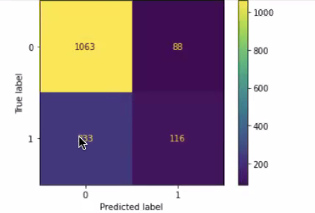
Results should look something like this 

In [41]:
pip install --upgrade scikit-learn

  Found existing installation: scikit-learn 0.21.2
    Uninstalling scikit-learn-0.21.2:
      Successfully uninstalled scikit-learn-0.21.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\perha\\anaconda3\\lib\\site-packages\\~klearn\\decomposition\\cdnmf_fast.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [46]:
probs = model.predict_proba(features_test)

In [47]:
probs

array([[1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       ...,
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2]])

(array([ 41.,   0.,  60.,   0., 154., 259.,   0.,   0., 357., 629.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

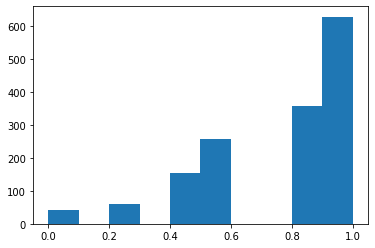

In [48]:
plt.hist(probs[:,0])

In [49]:
probs[:,0] > 0.8

array([ True, False,  True, ..., False, False, False])

In [59]:
metrics.plot_roc_curve(model, features_test, target_test)

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

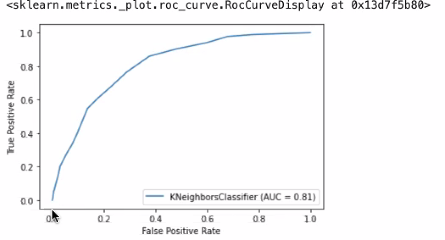
Should look like this

In [60]:
print(metrics.classification_report(target_test, model.predict(features_test)))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1168
           1       0.48      0.37      0.42       332

    accuracy                           0.77      1500
   macro avg       0.66      0.63      0.64      1500
weighted avg       0.75      0.77      0.76      1500



# Scaling

https://sklearn.org/modules/preprocessing.html#preprocessing

It's much easier to understand if you use standard libraries, instead of coding you're own algos. Even though coding your own might be more "learning" for you.

In [61]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler().fit(transformed_features)

In [66]:
scaler.transform(transformed_features)   #standard scaler standarizes ds

array([[-1.55705913, -1.60092771, -1.3938822 , ..., -0.32662574,
        -0.09422382,  0.41314165],
       [-0.90142462, -0.04413507, -1.3938822 , ..., -0.32662574,
        10.61302801, -2.42047734],
       [-0.82857634, -0.04413507, -1.3938822 , ..., -0.32662574,
        -0.09422382,  0.41314165],
       ...,
       [ 0.26414786,  0.73426125,  0.71742074, ..., -0.32662574,
        -0.09422382,  0.41314165],
       [-0.75572806, -0.04413507,  0.71742074, ..., -0.32662574,
        -0.09422382,  0.41314165],
       [ 1.13832722, -0.04413507,  0.71742074, ..., -0.32662574,
        -0.09422382,  0.41314165]])

In [67]:
transformed_features = pd.DataFrame(scaler.transform(transformed_features), columns=transformed_features.columns)

In [68]:
transformed_features.std()

age                         1.0001
education-num               1.0001
sex_ Male                   1.0001
education_ 11th             1.0001
education_ 12th             1.0001
education_ 1st-4th          1.0001
education_ 5th-6th          1.0001
education_ 7th-8th          1.0001
education_ 9th              1.0001
education_ Assoc-acdm       1.0001
education_ Assoc-voc        1.0001
education_ Bachelors        1.0001
education_ Doctorate        1.0001
education_ HS-grad          1.0001
education_ Masters          1.0001
education_ Preschool        1.0001
education_ Prof-school      1.0001
education_ Some-college     1.0001
race_ Asian-Pac-Islander    1.0001
race_ Black                 1.0001
race_ Other                 1.0001
race_ White                 1.0001
dtype: float64

In [70]:
transformed_features['sex_ Male']

0      -1.393882
1      -1.393882
2      -1.393882
3      -1.393882
4       0.717421
5       0.717421
6       0.717421
7      -1.393882
8       0.717421
9       0.717421
10      0.717421
11     -1.393882
12      0.717421
13     -1.393882
14      0.717421
15      0.717421
16      0.717421
17     -1.393882
18      0.717421
19      0.717421
20     -1.393882
21      0.717421
22      0.717421
23      0.717421
24      0.717421
25      0.717421
26      0.717421
27      0.717421
28     -1.393882
29      0.717421
          ...   
4970    0.717421
4971    0.717421
4972    0.717421
4973   -1.393882
4974    0.717421
4975    0.717421
4976    0.717421
4977    0.717421
4978    0.717421
4979    0.717421
4980   -1.393882
4981    0.717421
4982   -1.393882
4983    0.717421
4984    0.717421
4985    0.717421
4986    0.717421
4987    0.717421
4988    0.717421
4989   -1.393882
4990    0.717421
4991    0.717421
4992    0.717421
4993    0.717421
4994   -1.393882
4995    0.717421
4996    0.717421
4997    0.7174

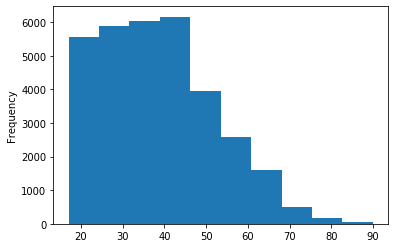

In [71]:
df['age'].plot.hist()

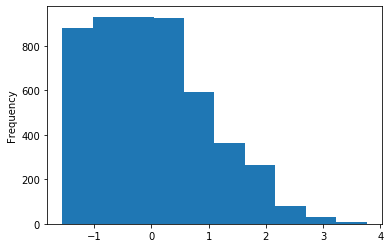

In [73]:
transformed_features['age'].plot.hist()

Notice the two shapes are the exact same, while the scale has changed.

In [75]:
features_train, features_test, target_train, target_test = train_test_split(
transformed_features, target, test_size=0.3)  # split into 70/30 split

In [77]:
model = KNeighborsClassifier(20).fit(features_train, target_train)

In [78]:
metrics.accuracy_score(target_test, model.predict(features_test))

0.8086666666666666

In [79]:
ks = list(range(5, 60, 5))

In [80]:
models = [KNeighborsClassifier(k).fit(features_train, target_train) for k in ks]

In [81]:
scores = [metrics.accuracy_score(target_test, m.predict(features_test)) for m in models]

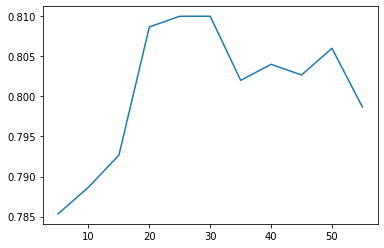

In [82]:
plt.plot(ks, scores)

In [83]:
train_scores = [metrics.accuracy_score(target_train, m.predict(features_train)) for m in models]

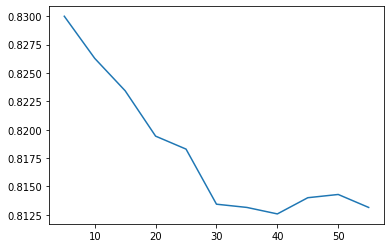

In [84]:
plt.plot(ks, train_scores)

The ideal k here seems to be around 30. Too big of k will cause us to loss the structure of our data, (will converge to average of entire ds). Too small, and we haven't captured what the ds is actually showing us. 